<a href="https://colab.research.google.com/github/AzadMehedi/ML-Algorithoms/blob/main/k_Fold_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import svm


In [7]:
url = 'https://raw.githubusercontent.com/fazlyrabbi77/Cancer-Prediction-Logistic-Regression/master/haberman.csv'
df = pd.read_csv(url)
df.head()

,age,operation_year,axil_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [11]:
# feature and target variable
features = ['age','operation_year','axil_nodes']
X = df[features]
df['status'] = df['status'].map({1:0, 2:1})
y = df['status']

In [13]:
# spliting the dataset for model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)



In [16]:
# making support vector machine model and we'll cross validate the model into 10 fold

svm_model = svm.SVC(kernel='linear').fit(X_train, y_train)
# svm_ml = svm.SVC(kernel='linear')
# svm_ml.fit(X_train,y_train) 
cv_svm = cross_validate(svm_model, X, y, cv=10)
print('Test Score: \n', cv_svm['test_score'])
print('Mean Test Score: \n', cv_svm['test_score'].mean())

Test Score: 
 [0.77419355 0.74193548 0.74193548 0.74193548 0.74193548 0.67741935
 0.73333333 0.73333333 0.7        0.73333333]
Mean Test Score: 
 0.7319354838709677


### we can see the 10 different accuracy score and mean accuracy score for 10 fold. 

In [17]:
# let's create a dataframe of theses accuracy values
dcore_df_svm = pd.DataFrame(cv_svm)
dcore_df_svm

,fit_time,score_time,test_score
0,0.180075,0.003521,0.774194
1,0.030128,0.003810,0.741935
2,0.101658,0.003211,0.741935
3,0.145051,0.003655,0.741935
4,0.160681,0.003362,0.741935
5,0.207819,0.013430,0.677419
6,0.039046,0.003393,0.733333
7,0.104507,0.004702,0.733333
8,0.112056,0.003436,0.700000
9,0.071338,0.003438,0.733333


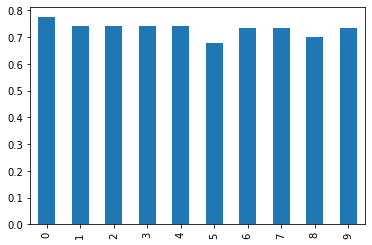

In [22]:
ax = dcore_df_svm['test_score'].plot.bar()

In [25]:
# let's see how k fold cross validation work for logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

cv_logit = cross_validate(logreg, X, y, cv=10)
print('Test Score: ',cv_logit['test_score'])
print('Mean Test Score', cv_logit['test_score'].mean())

Test Score:  [0.74193548 0.80645161 0.77419355 0.74193548 0.74193548 0.67741935
 0.73333333 0.76666667 0.76666667 0.7       ]
Mean Test Score 0.7450537634408603


### accuracy score for logistic regression is 74%.